In [1]:
import pandas as pd
import numpy as np
import os, ast
os.chdir('..')
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
vdj = pd.read_csv('data/vdj_cleaned_subset_for_MI_IMGT_TCRs.csv', index_col=0)
# vdj = vdj.loc[vdj['Epitope'] != 'KLGGALQAK'] # because too big - takes forever
epitope_counts = vdj['Epitope'].value_counts()
print(epitope_counts)
epitopes = vdj['Epitope'].unique().tolist()

KLGGALQAK     13435
GILGFVFTL      1894
AVFDRKSDAK     1699
RAKFKQLL       1200
IVTDFSVIK       704
RLRAEAQVK       412
ELAGIGILTV      380
NLVPMVATV       357
SSLENFRAYV      350
GLCTLVAML       345
YLQPRTFLL       333
HGIRNASFI       243
TTDPSFLGRY      242
LLWNGPMAV       235
CINGVCWTV       226
ASNENMETM       201
SSYRRPVGI       177
SPRWYFYYL       175
SSPPMFRV        133
LSLRNPILV       127
ATDALMTGF       125
LTDEMIAQY       124
KSKRTPMGF       103
Name: Epitope, dtype: int64


In [3]:
MI = pd.DataFrame()

for ep in epitopes + ['background', 'Tanno::A1::naive']:
    df = pd.read_csv('data/output/mutual_info/mutual_info_' + ep + '_endpadding.csv')
    MI = pd.concat([MI, df])

In [4]:
print(MI.head())

           Unnamed: 0                                                  2  \
0          ELAGIGILTV  [49.906597000316054, 34.65735902799726, 62.383...   
1  ELAGIGILTV_shuffle  [49.906597000316054, 34.65735902799726, 62.383...   
2          ELAGIGILTV  [0.0, 0.0, 0.0, 0.6931471805599453, 0.69314718...   
3  ELAGIGILTV_shuffle  [0.0, 0.0, 0.0, 0.6931471805599453, 0.69314718...   
4          ELAGIGILTV  [0.6931471805599453, 0.6931471805599453, 0.0, ...   

                                                   5  \
0  [99.43419293227296, 159.36840544792005, 185.86...   
1  [95.37453906431485, 159.36840544792008, 186.97...   
2  [0.9502705392332345, 1.3321790402101223, 0.223...   
3  [0.9502705392332345, 1.3321790402101223, 0.500...   
4  [1.6094379124341005, 1.6094379124341005, 1.054...   

                                                  10  \
0  [190.45489362413605, 159.61632262611394, 151.5...   
1  [197.8941689701564, 158.10524312269044, 139.42...   
2  [0.5004024235381881, 0.472234865942

In [5]:
MI.columns

Index(['Unnamed: 0', '2', '5', '10', '15', '20', '25', '35', '50', '80', '100',
       '150', '200', '300', '380', 'type', '500', '1000', '1500', '1853',
       '353', '343', '348', '187', '333', '235', '226', '90', '123', '1699',
       '704', '2000', '2500', '3000', '5000', '10000', '13431', '1195', '412',
       '240', '125', '127', '177', '124', '242', '175', '9691', '835'],
      dtype='object')

In [6]:
ss = [25, 35, 50, 80, 100, 150, 200, 300, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000] # same subsample as for original set to make it comparable
ss = [str(x) for x in ss]
MI = MI.set_index(['type', 'Unnamed: 0'])[ss]
MI.columns = [int(x) for x in MI.columns]
MI = MI.sort_index(axis=1)
print(MI)

                                                                                  25     \
type        Unnamed: 0                                                                    
cdr3a-cdr3b ELAGIGILTV                [147.40340242308713, 162.63568206662234, 148.3...   
            ELAGIGILTV_shuffle        [148.3489642602038, 164.00845067226834, 150.28...   
Va-Vb       ELAGIGILTV                [0.7668382315802122, 0.7174352514213597, 0.945...   
            ELAGIGILTV_shuffle        [0.7113864571354167, 0.7938169516167372, 0.890...   
Ja-Jb       ELAGIGILTV                [1.6460124172766668, 1.7705078891098893, 1.496...   
...                                                                                 ...   
Vb-CDR3a    Tanno::A1::naive_shuffle  [13.61155314129504, 12.557971786861613, 15.349...   
Ja-CDR3b    Tanno::A1::naive          [15.344239232121112, 15.99950360590282, 17.432...   
            Tanno::A1::naive_shuffle  [15.62883610715204, 16.546683347543826, 17.168...   

In [7]:
MI1 = MI.dropna(axis=0, how='all')
MI1 = MI1.replace(pd.NA, '[]')

In [8]:
print(MI1)

                                                                                  25     \
type        Unnamed: 0                                                                    
cdr3a-cdr3b ELAGIGILTV                [147.40340242308713, 162.63568206662234, 148.3...   
            ELAGIGILTV_shuffle        [148.3489642602038, 164.00845067226834, 150.28...   
Va-Vb       ELAGIGILTV                [0.7668382315802122, 0.7174352514213597, 0.945...   
            ELAGIGILTV_shuffle        [0.7113864571354167, 0.7938169516167372, 0.890...   
Ja-Jb       ELAGIGILTV                [1.6460124172766668, 1.7705078891098893, 1.496...   
...                                                                                 ...   
Vb-CDR3a    Tanno::A1::naive_shuffle  [13.61155314129504, 12.557971786861613, 15.349...   
Ja-CDR3b    Tanno::A1::naive          [15.344239232121112, 15.99950360590282, 17.432...   
            Tanno::A1::naive_shuffle  [15.62883610715204, 16.546683347543826, 17.168...   

In [9]:
for c in MI1.columns:
    MI1[c] = [ast.literal_eval(x) for x in MI1[c]]
    MI1[c] = [x if type(x) == list else [x]*10 for x in MI1[c]]
# print(MI1)

In [10]:
MI1 = MI1.reset_index(names = ['type','epitope'])
MI1['shuffle'] = ['shuffle' if 'shuffle' in x else 'real' for x in MI1['epitope']]
MI1['epitope'] = [x.split('_')[0] for x in MI1['epitope']]
# print(MI1)

In [11]:
MI2 = MI1.set_index(['epitope', 'shuffle', 'type']).apply(pd.Series).stack().explode()
MI2 = MI2.reset_index().rename(columns = {'level_3':'subsample', 0:'value'}).dropna(subset='value')

In [12]:
MI2['1/N'] = 1/MI2['subsample']

In [13]:
# ax = plt.subplot()
# sns.scatterplot(data = MI2, x = 'subsample', y='value', style='type', ax=ax, hue='epitope')
# plt.show()

In [14]:
# ax = plt.subplot()
# sns.scatterplot(data = MI2, x = '1/N', y='value', style='shuffle', ax=ax, hue='epitope', alpha = 0.5)
# ax.semilogx()
# plt.legend(bbox_to_anchor = [1.05,1])
# plt.show()

In [15]:
def fit_linear(mydf, title, ax):    
    single_vals = []
    def _fit(mydf1):
        df = mydf1.copy()
        df = df.dropna(subset=['value'])
        x = np.array(df['1/N'])
        myfit = np.polyfit(x, df['value'].astype('float64'), deg=1)
        p = np.poly1d(myfit)
        x_unique = np.linspace(0, max(x))
        y_unique = p(x_unique)
        # print(p, x_unique, y_unique)
        # print(x, df['value'].astype('float64'))
        assert p(0) == myfit[1]
        return(x_unique, y_unique, p(0))
    
    for j in ['real', 'shuffle']:
        if j == 'real':
            linestyle = '-'
            marker = 'o'
            s = 30
            col='r'
        else:
            linestyle = '-'
            marker = 'X'
            s = 30
            col='k'
        mydf0 = mydf.loc[mydf.shuffle == j]
        x_unique, y_unique, single_val = _fit(mydf0)    
        xy = pd.DataFrame([x_unique, y_unique], index = ['x', 'y']).T
        sns.scatterplot(data = mydf0, x = '1/N', y='value', ax=ax, alpha = 0.5, marker = marker, c=col, s = s, legend=None)
        sns.lineplot(data=xy, x='x', y='y', color = col, linestyle = linestyle, alpha = 0.5,  label = j, ax=ax)
        single_vals.append(single_val)
        # ax.scatter(0, single_val, marker = marker, color = col, s = 300, alpha = 0.5)
    ax.set_title(title)
    ax.set_xlim(0,0.041)
    # ax.set_yscale('log')
    # ax.set_xscale('log')

    return(single_vals)

In [16]:
def fit_nonlinear(mydf, title, ax):    
    single_vals = []
    def _fit(mydf1):
        df = mydf1.copy()
        df = df.dropna(subset=['value'])
        x = np.array(df['1/N'])
        myfit = np.polyfit(np.log10(x), df['value'].astype('float64'), deg=2)
        # print(myfit)
        p = np.poly1d(myfit)
        x_unique = np.linspace(0, max(x),100)
        y_unique = p(np.log10(x_unique))
        print(p, x_unique, y_unique)
        # print(x, df['value'].astype('float64'))
        assert p(0) == myfit[-1]
        return(x_unique, y_unique, myfit[-1])
    
    for j in ['real', 'shuffle']:
        if j == 'real':
            linestyle = '-'
            marker = 'o'
            s = 30
            col='r'
        else:
            linestyle = '-'
            marker = 'X'
            s = 30
            col='k'
        mydf0 = mydf.loc[mydf.shuffle == j]
        x_unique, y_unique, single_val = _fit(mydf0)    
        xy = pd.DataFrame([x_unique, y_unique], index = ['x', 'y']).T
        print(xy)
        sns.scatterplot(data = mydf0, x = '1/N', y='value', ax=ax, alpha = 0.5, marker = marker, c=col, s = s, legend=None)
        sns.lineplot(data=xy, x='x', y='y', color = col, linestyle = linestyle, alpha = 0.5,  label = j, ax=ax)
        single_vals.append(single_val)
        # ax.scatter(0, single_val, marker = marker, color = col, s = 300, alpha = 0.5)
    ax.set_title(title)
    ax.set_xlim(0,0.041)
    # ax.set_yscale('log')
    # ax.set_xscale('log')

    return(single_vals)
    

In [17]:
output_folder = 'figures/'

(59700, 6)
['cdr3a-cdr3b', 'Va-Vb', 'Ja-Jb', 'Va-Ja', 'Vb-Jb', 'Va-Jb', 'Vb-Ja', 'Va-CDR3a', 'Vb-CDR3b', 'Ja-CDR3a', 'Jb-CDR3b', 'Va-CDR3b', 'Vb-CDR3a', 'Ja-CDR3b', 'Jb-CDR3a']
(59700, 6)
ASNENMETM


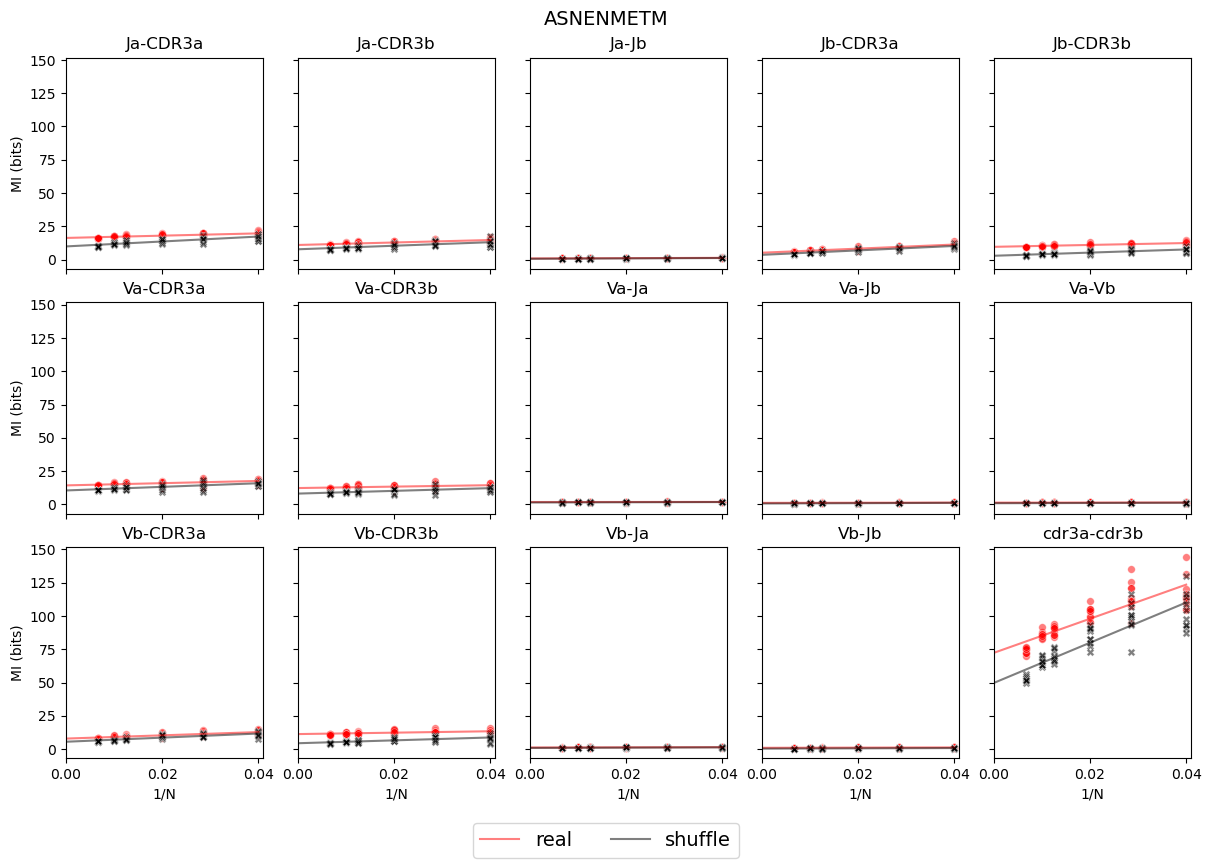

ATDALMTGF


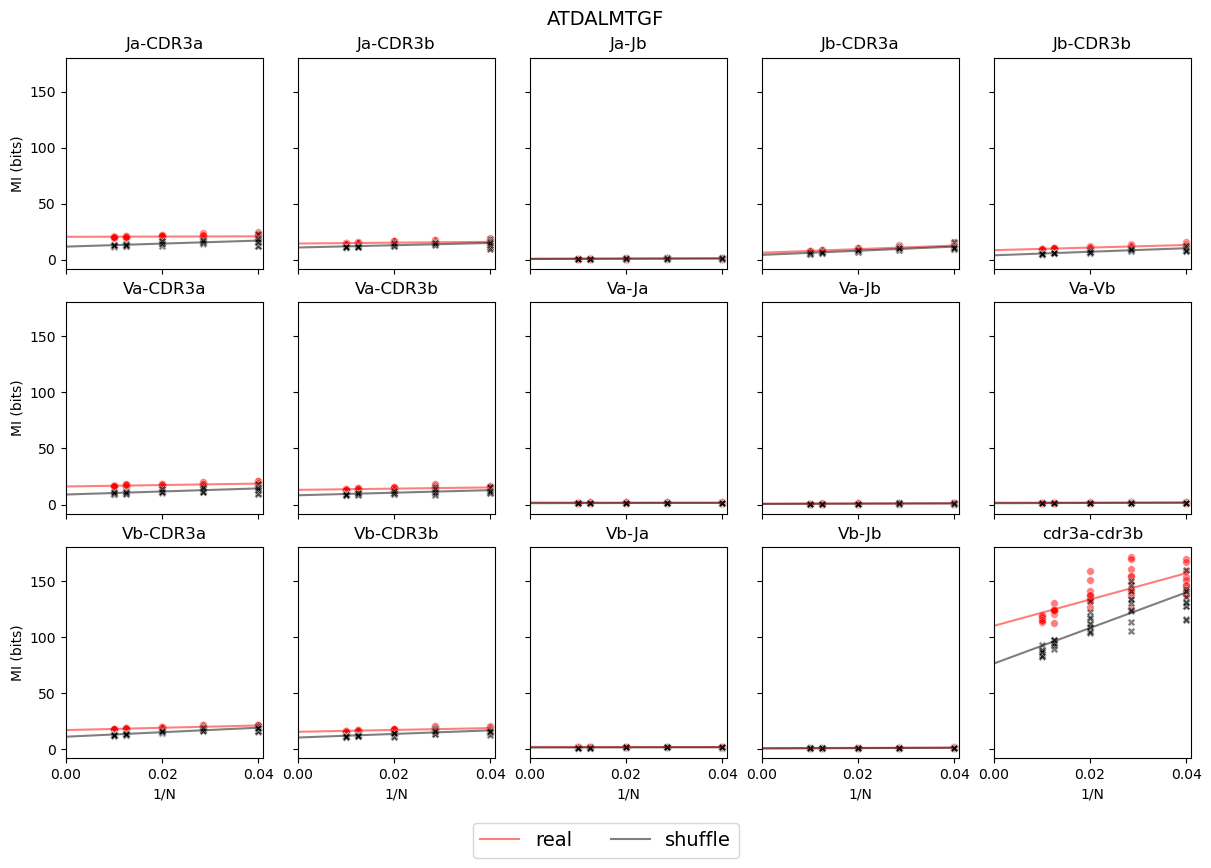

AVFDRKSDAK


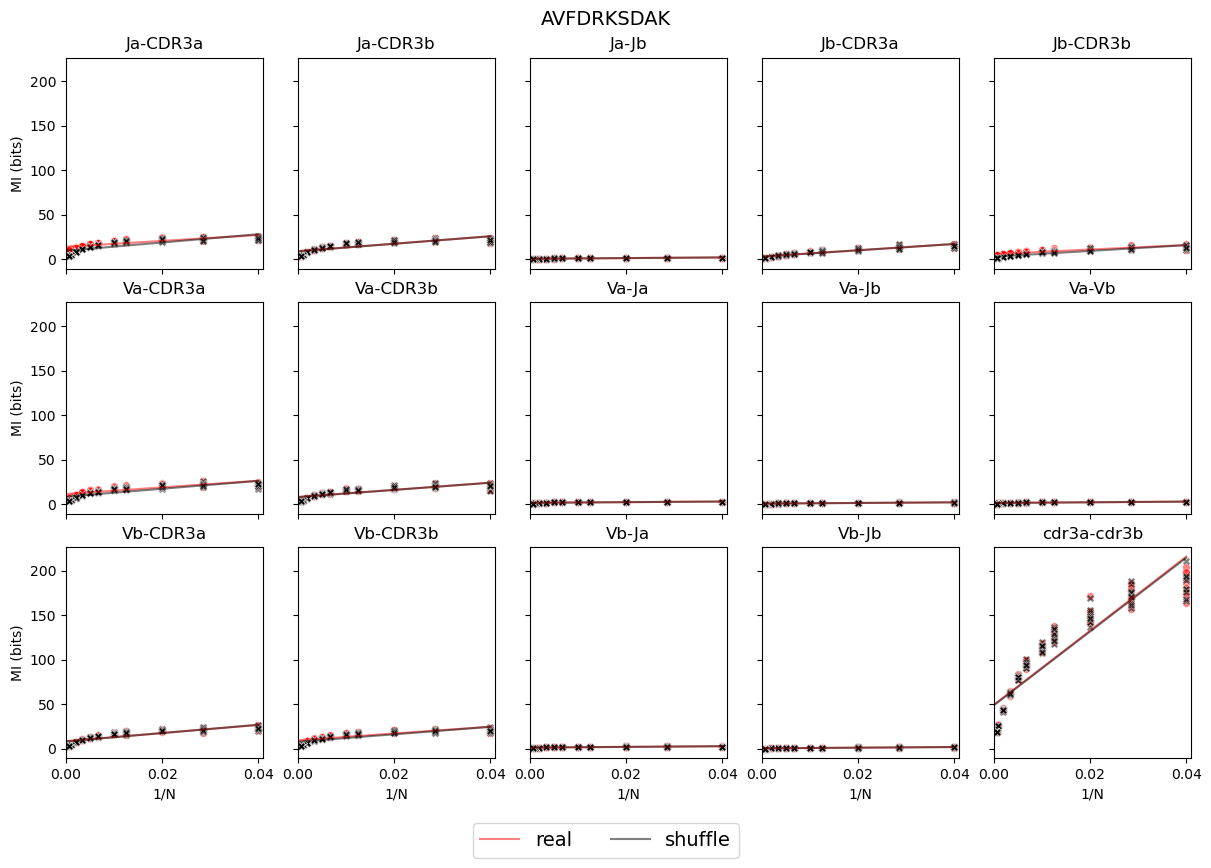

CINGVCWTV


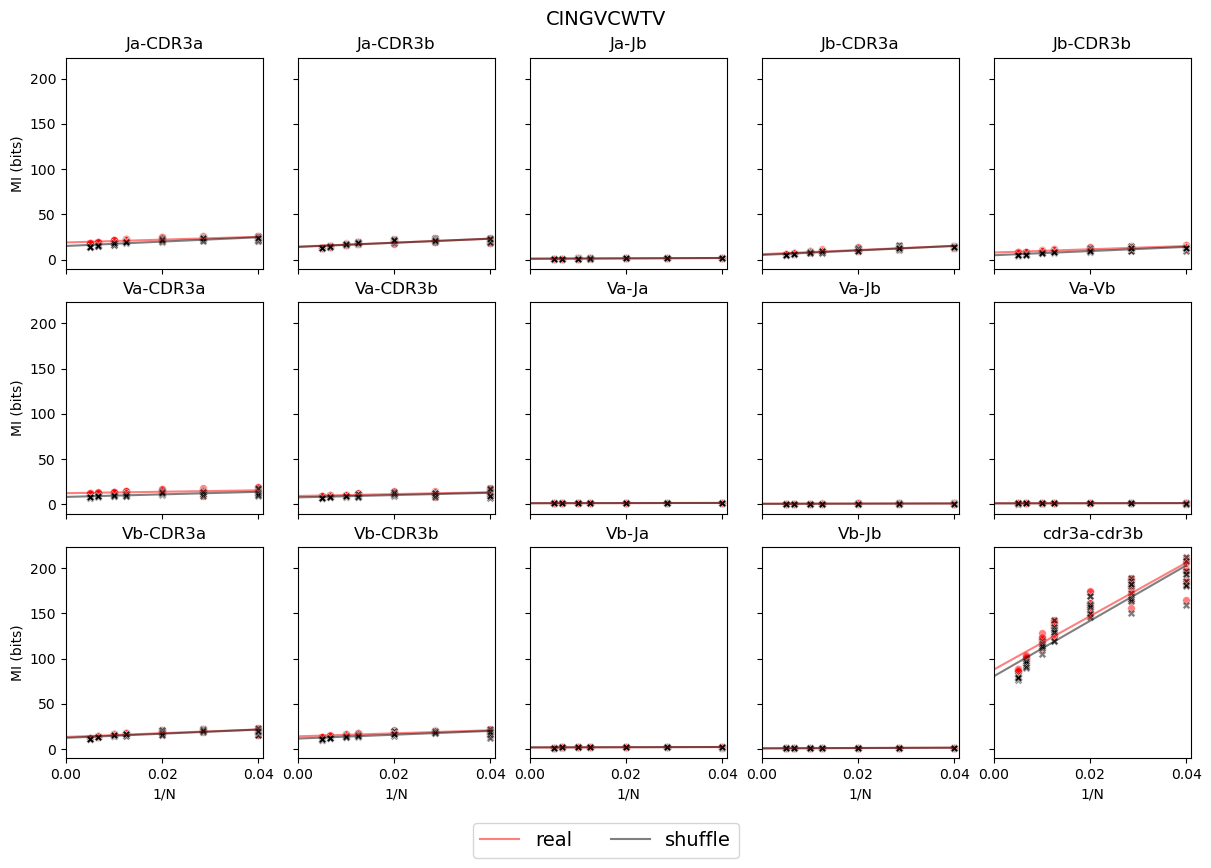

ELAGIGILTV


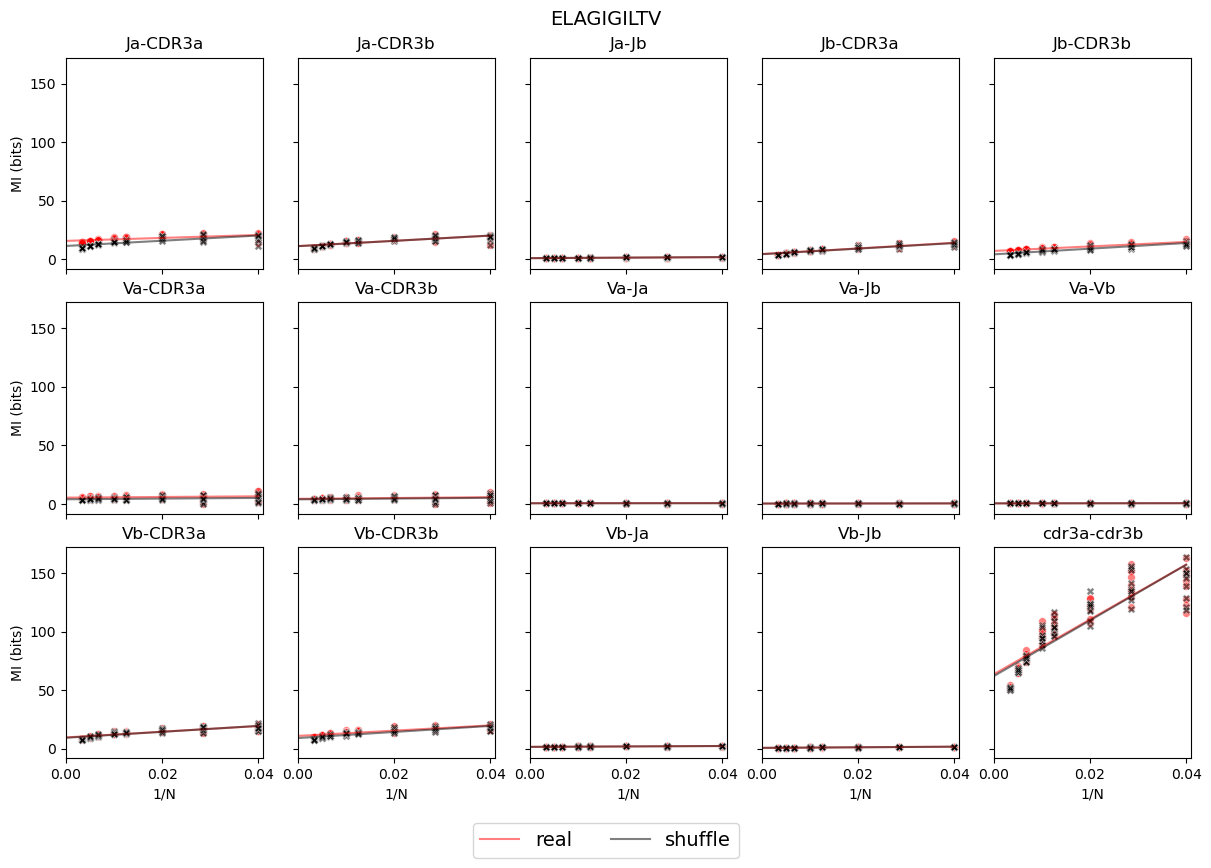

GILGFVFTL


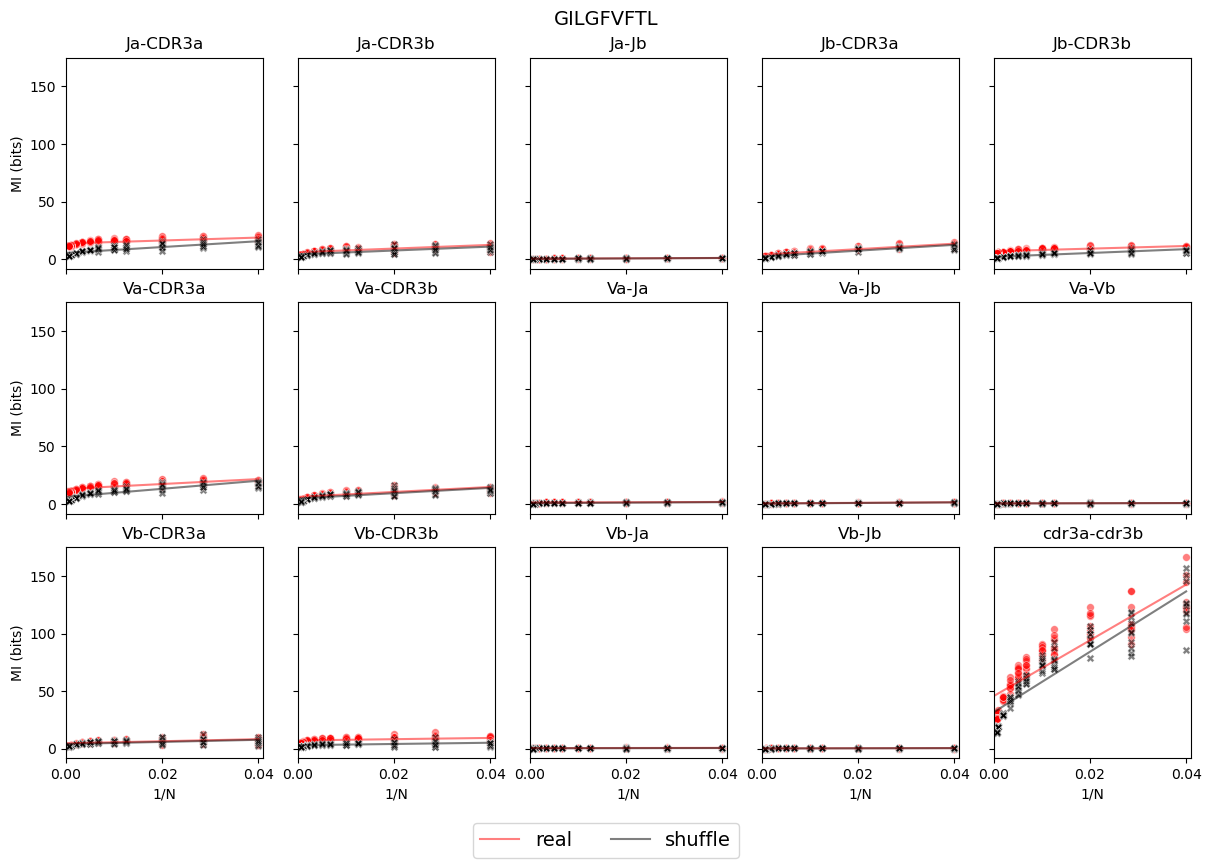

GLCTLVAML


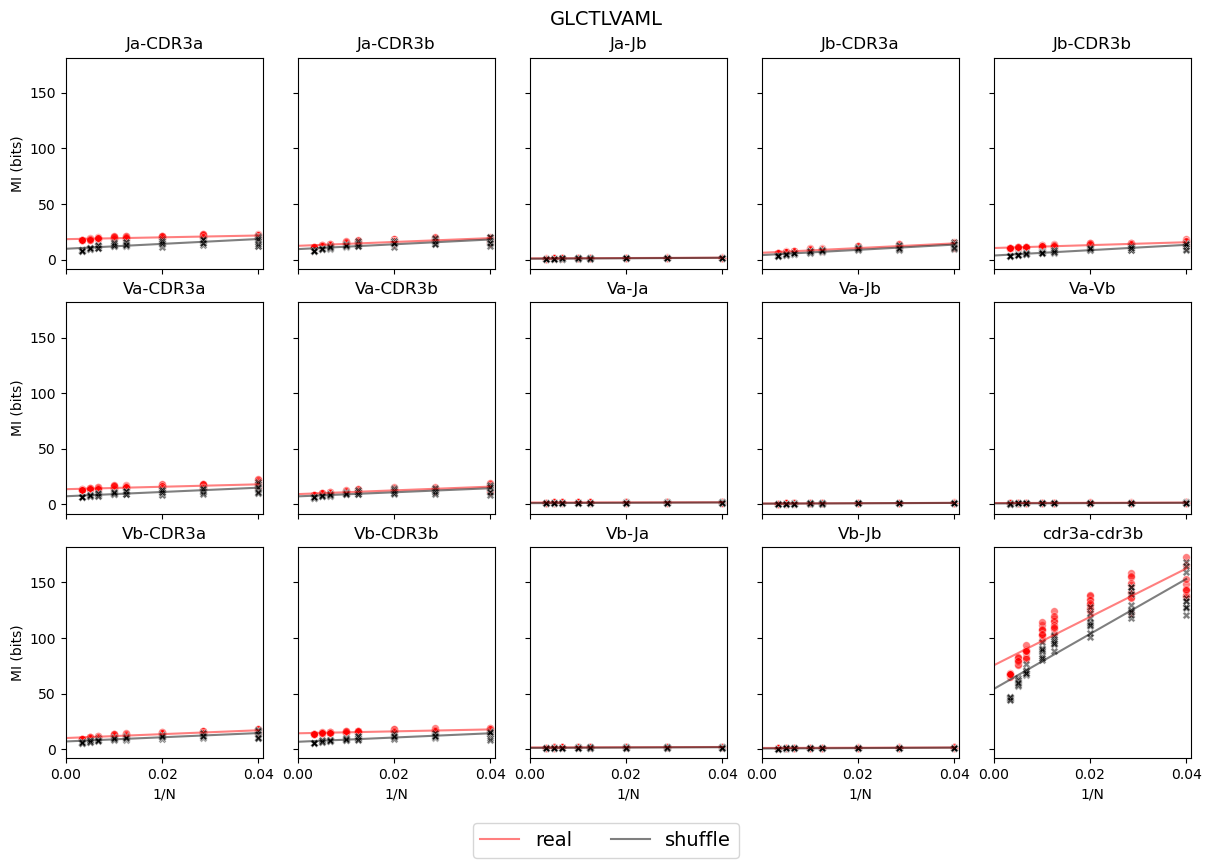

HGIRNASFI


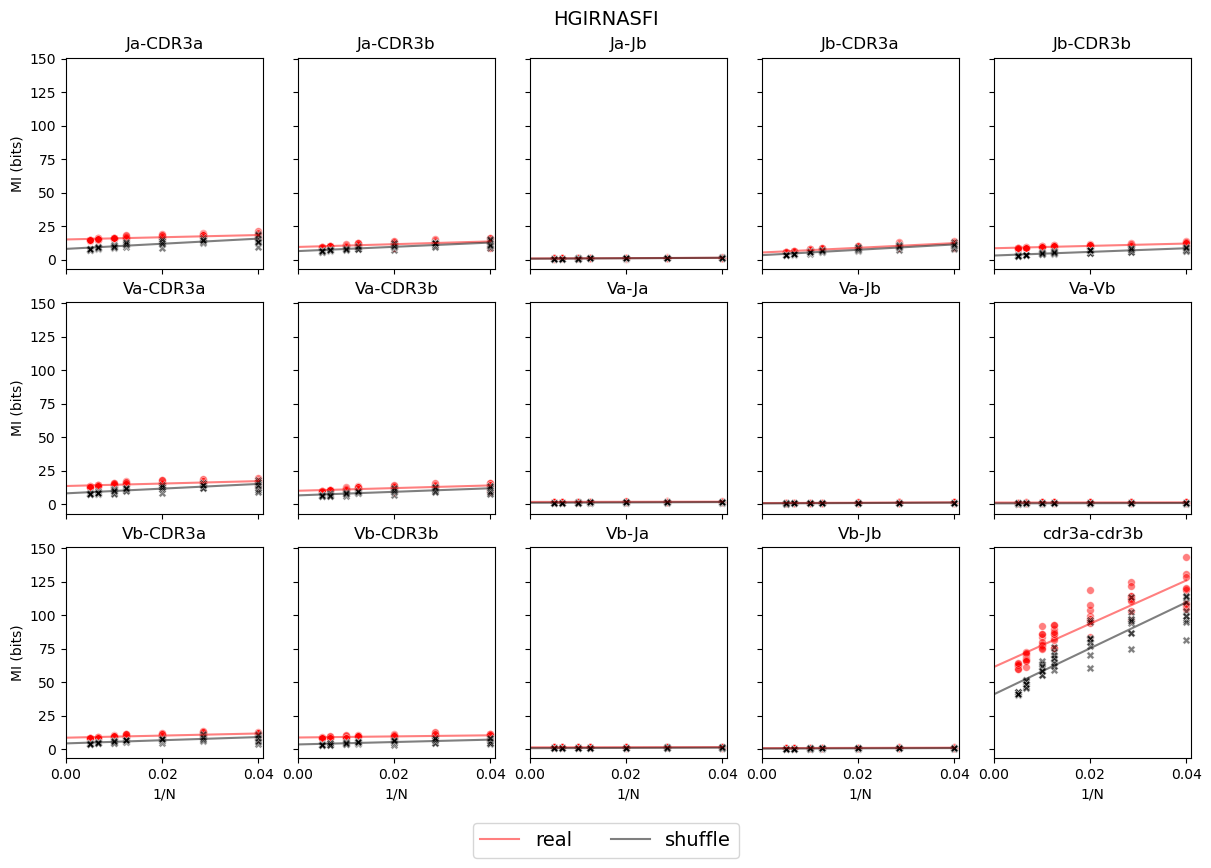

IVTDFSVIK


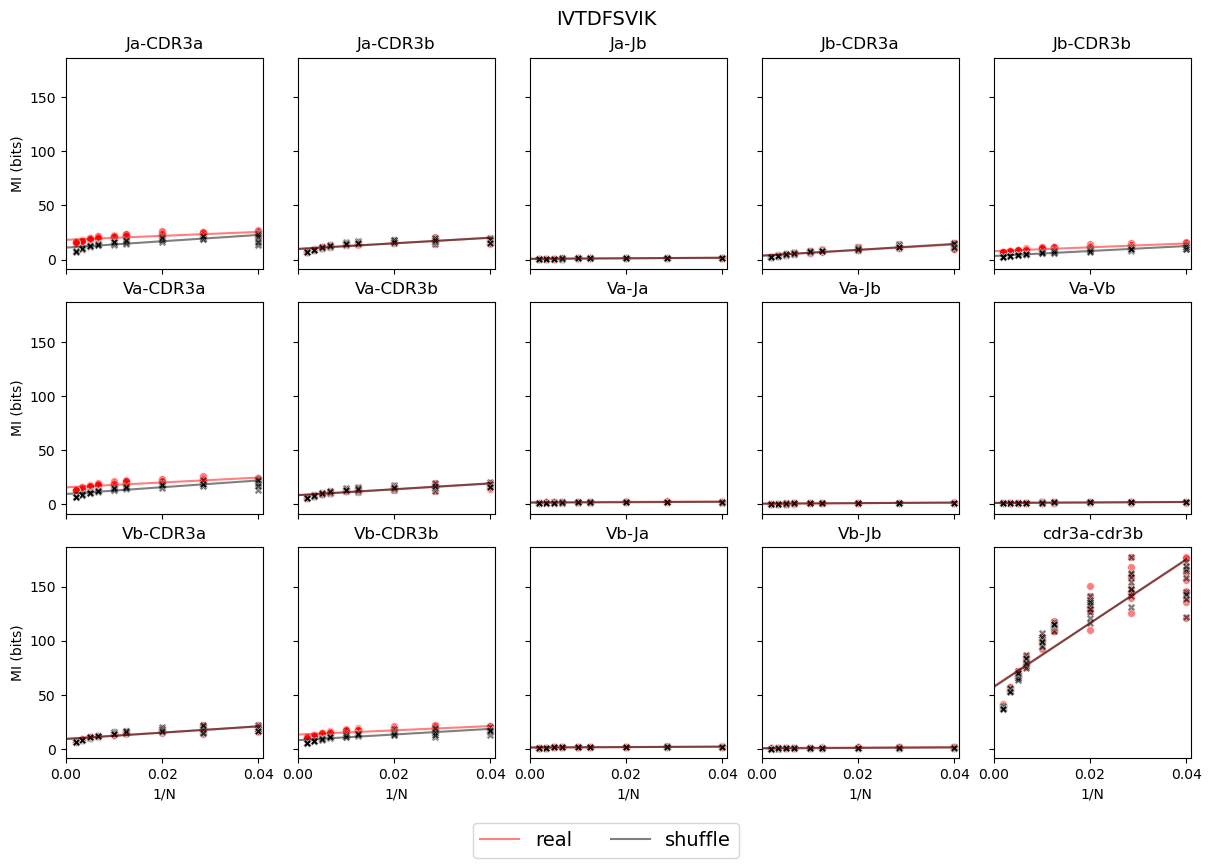

KLGGALQAK


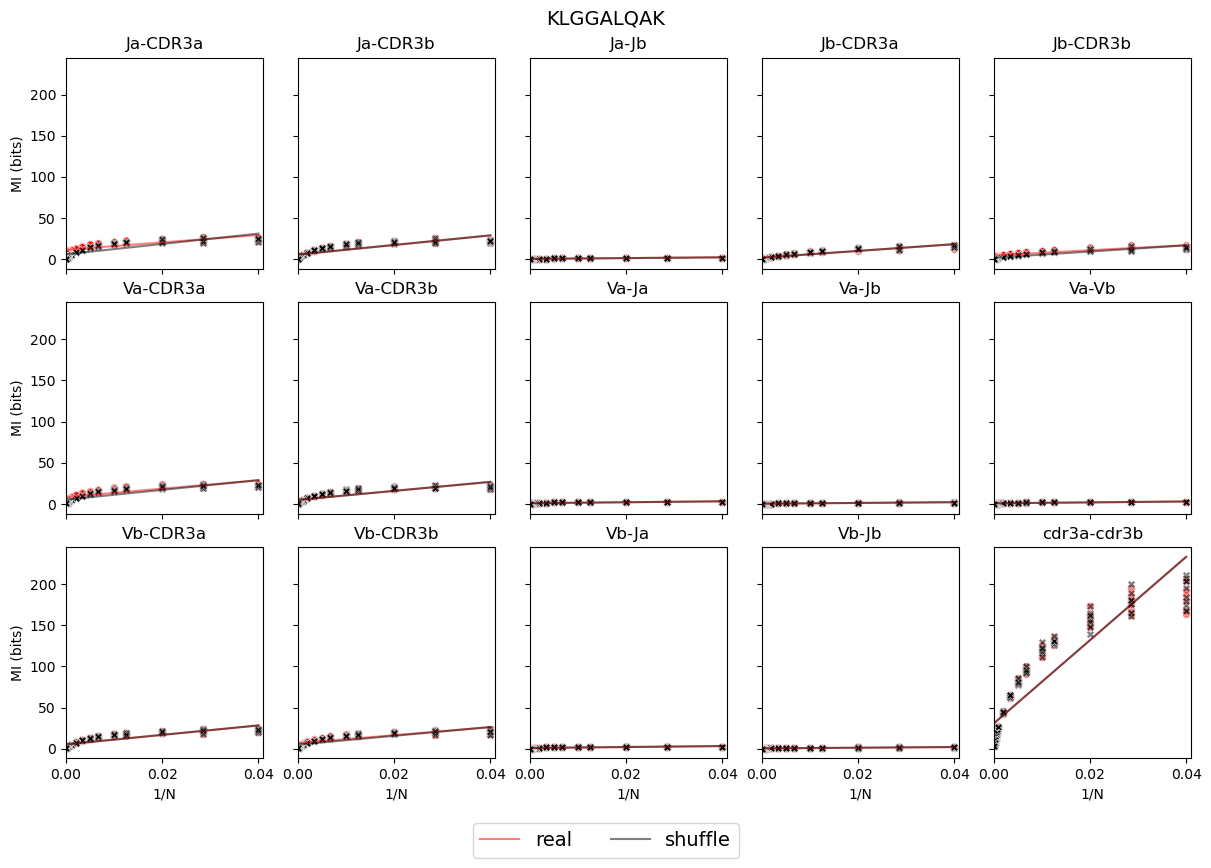

KSKRTPMGF


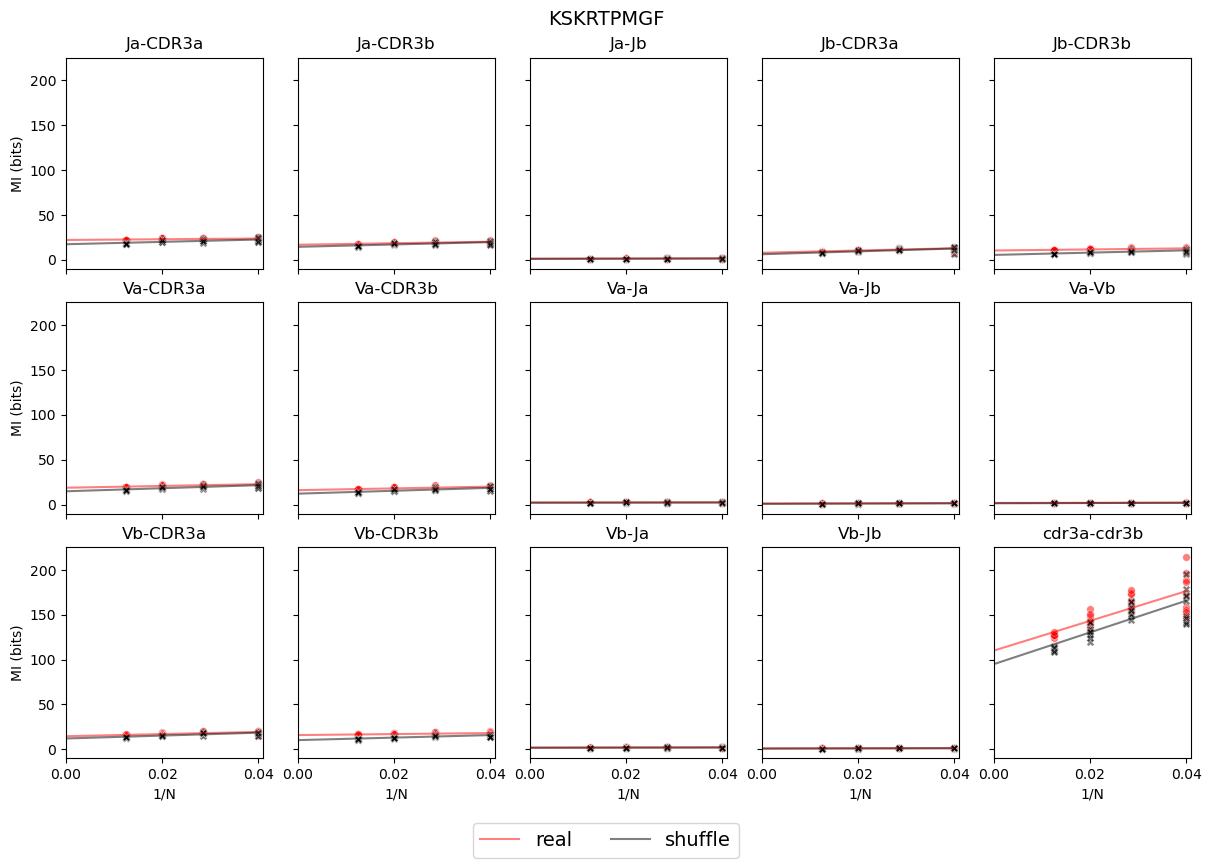

LLWNGPMAV


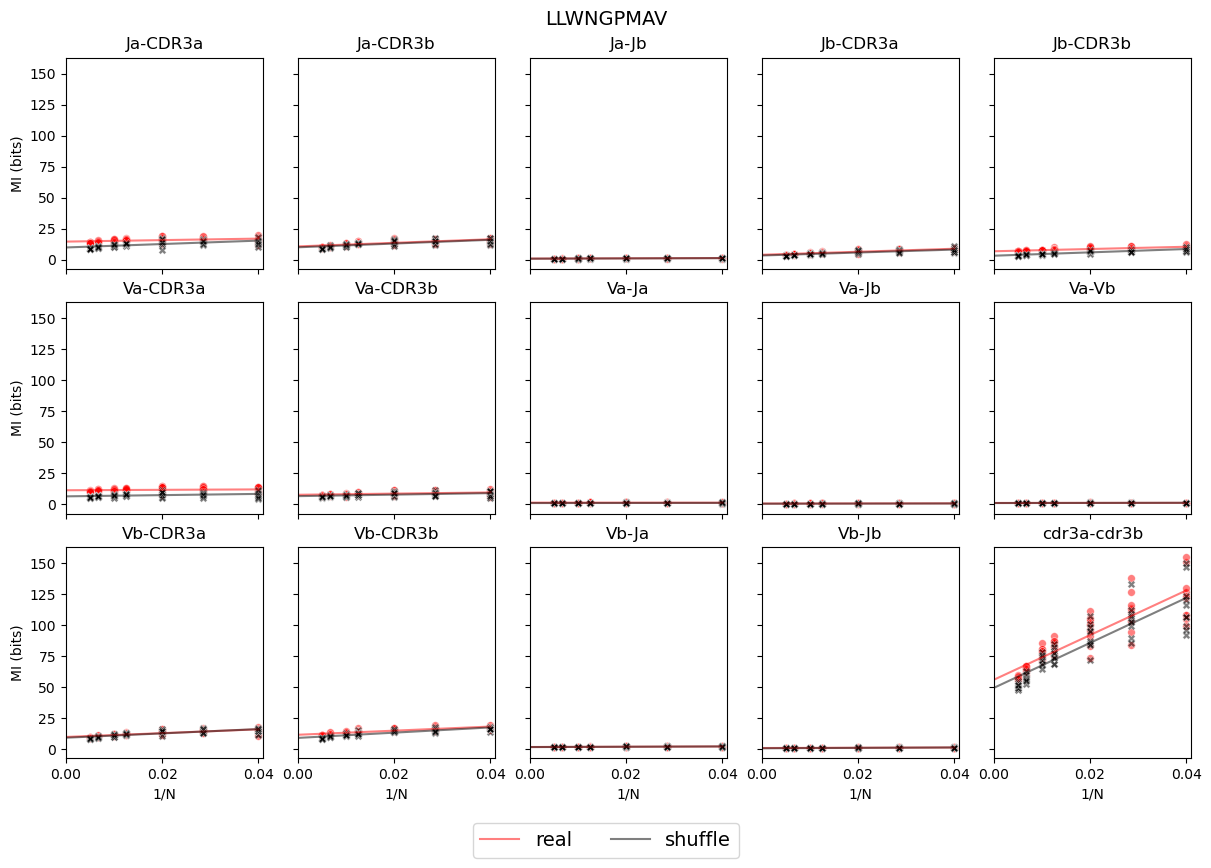

LSLRNPILV


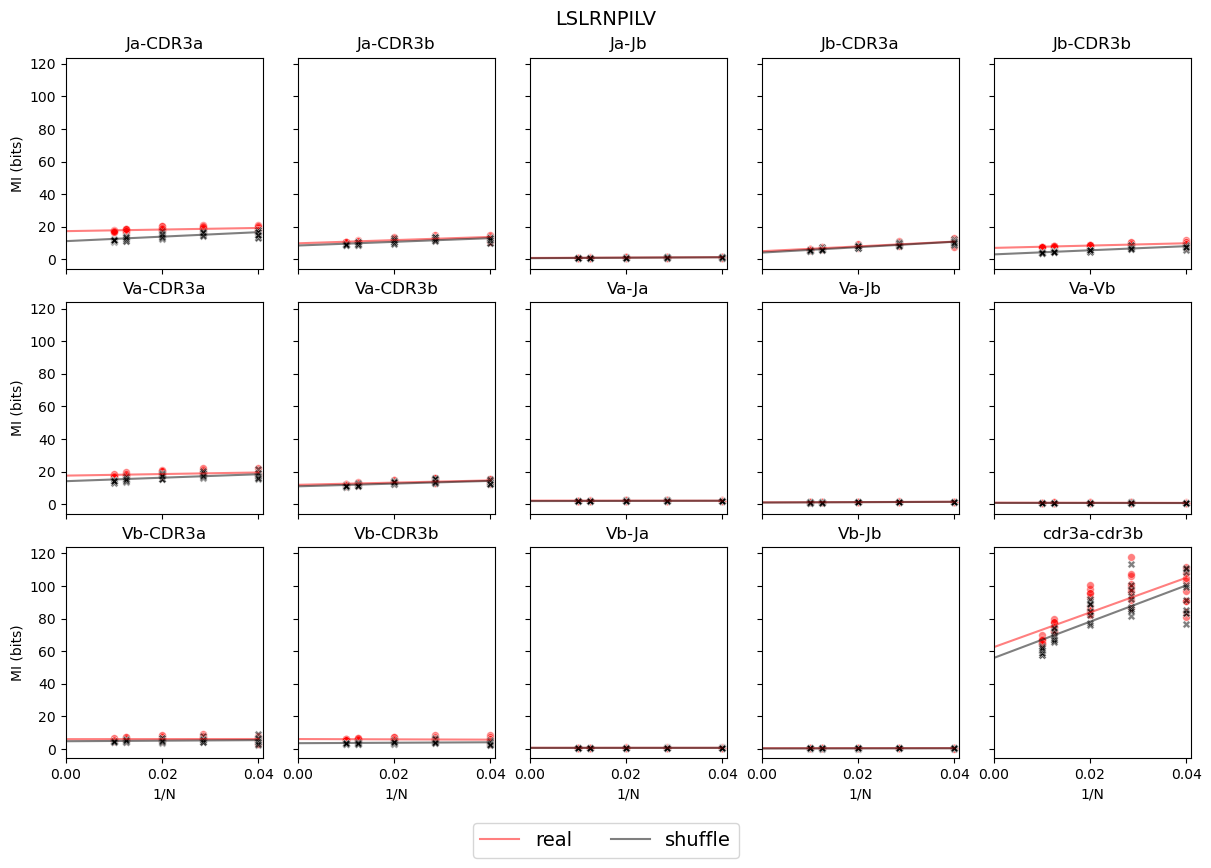

LTDEMIAQY


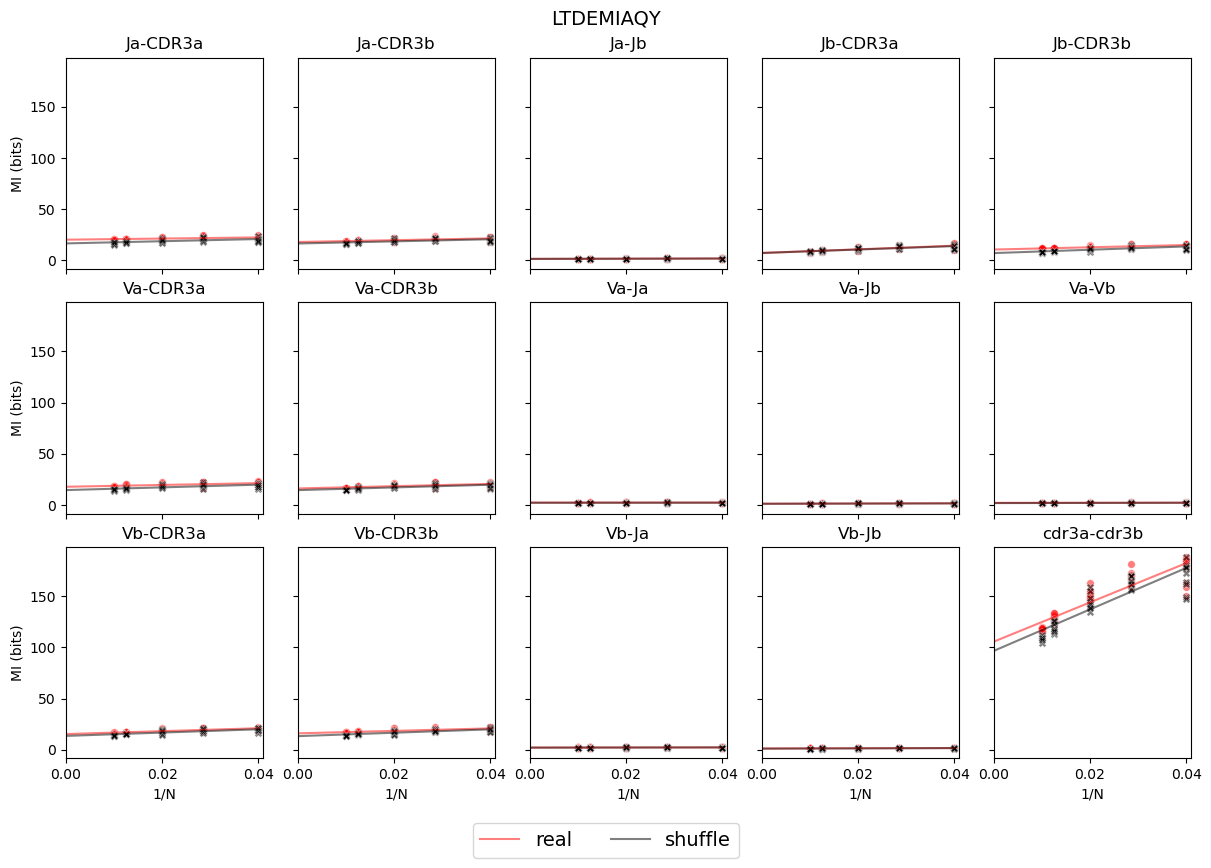

NLVPMVATV


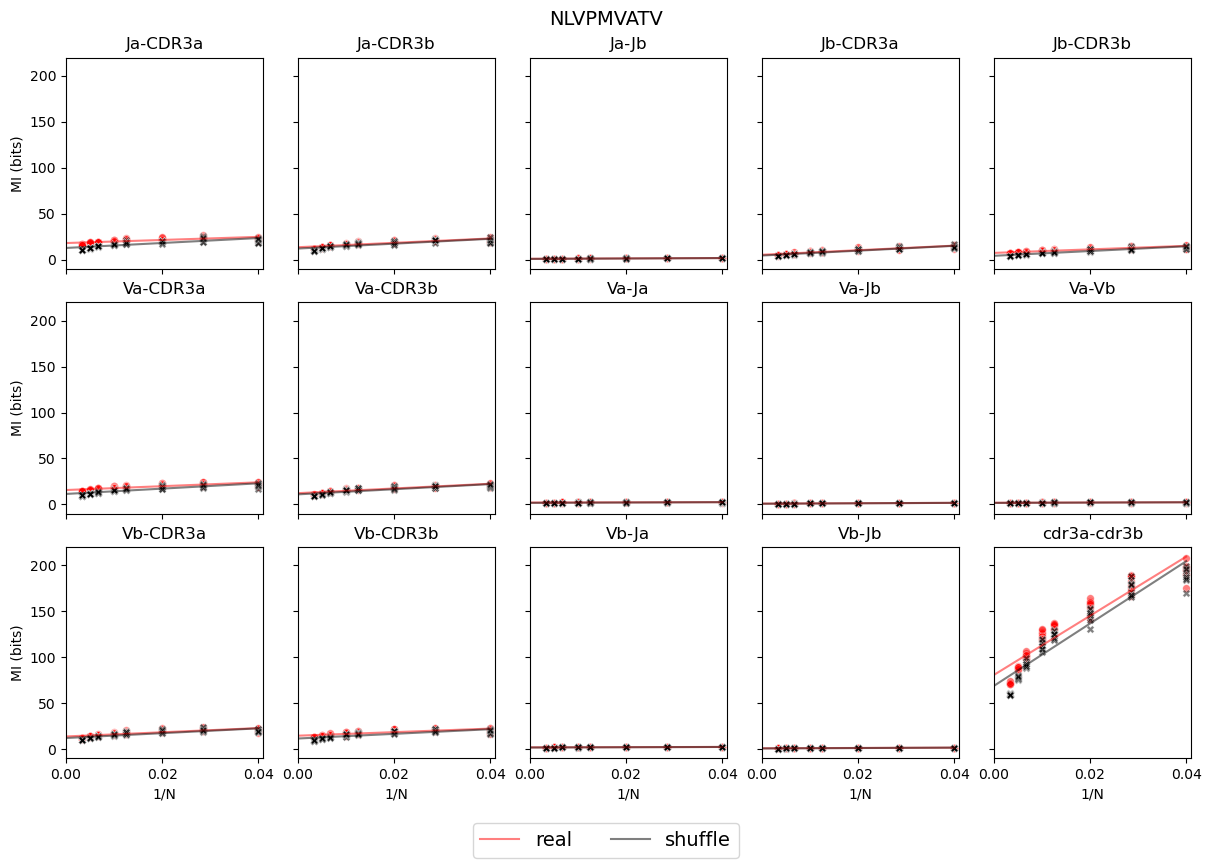

RAKFKQLL


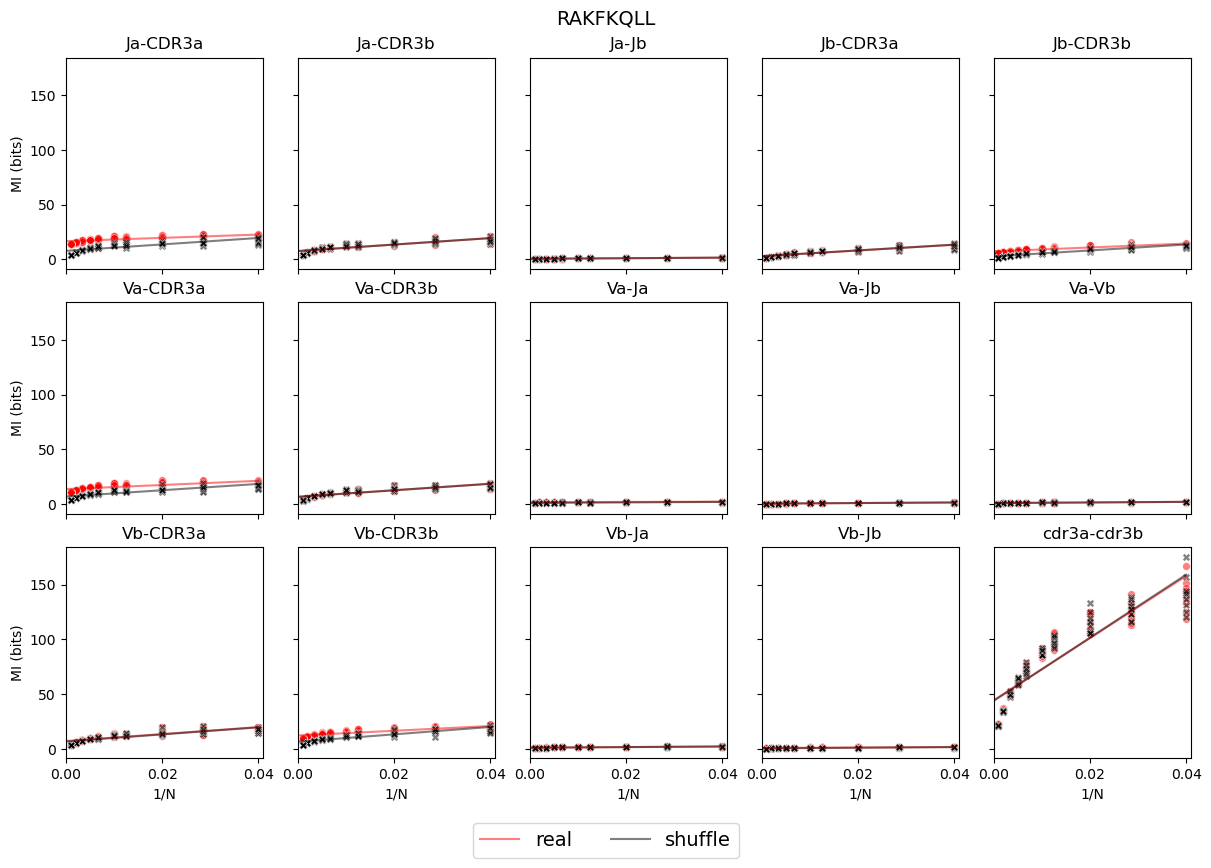

RLRAEAQVK


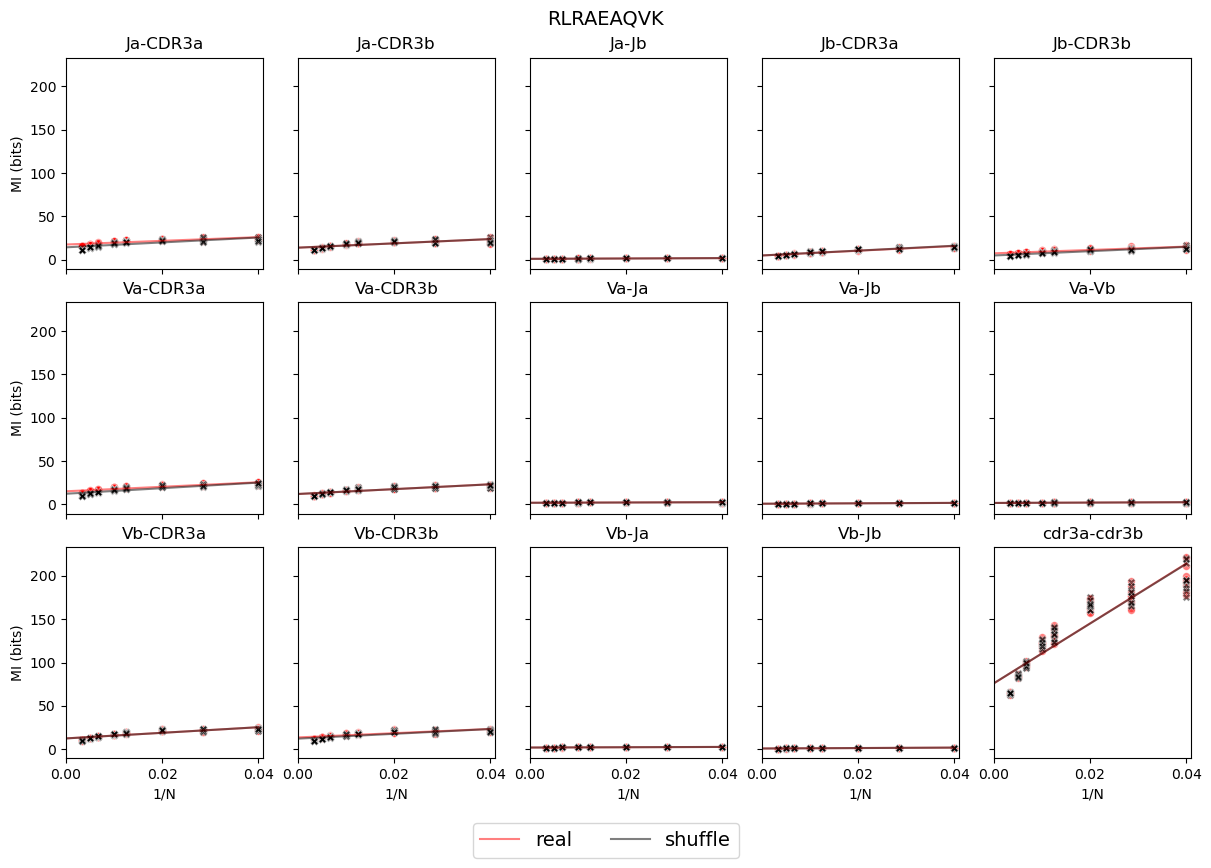

SPRWYFYYL


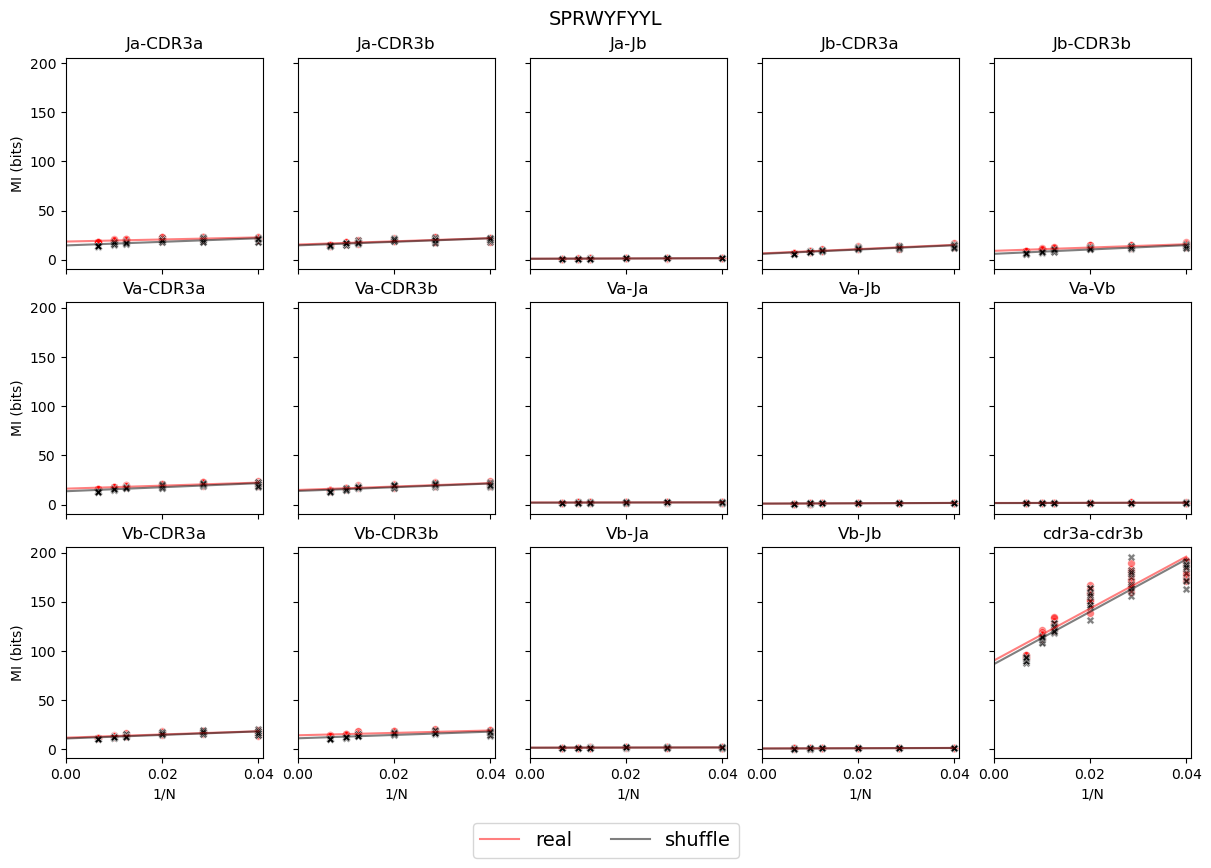

SSLENFRAYV


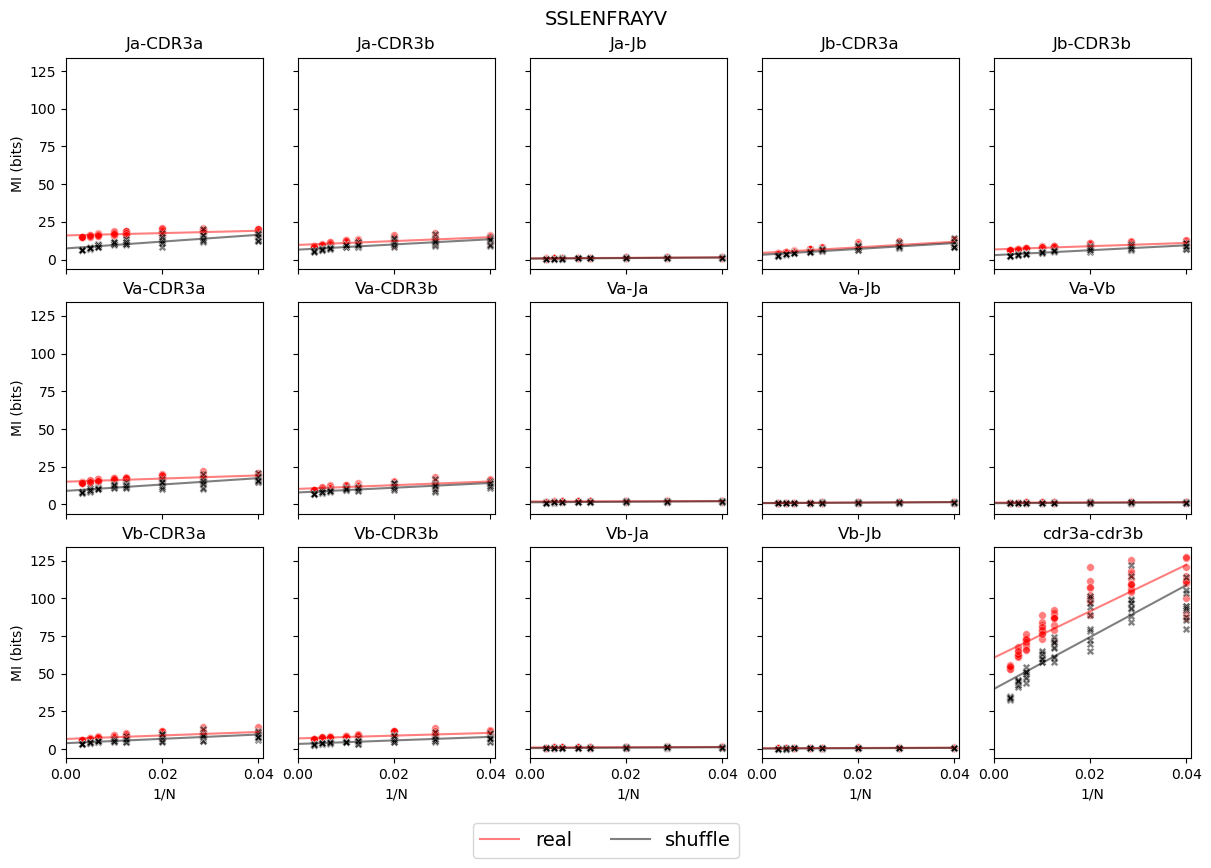

SSPPMFRV


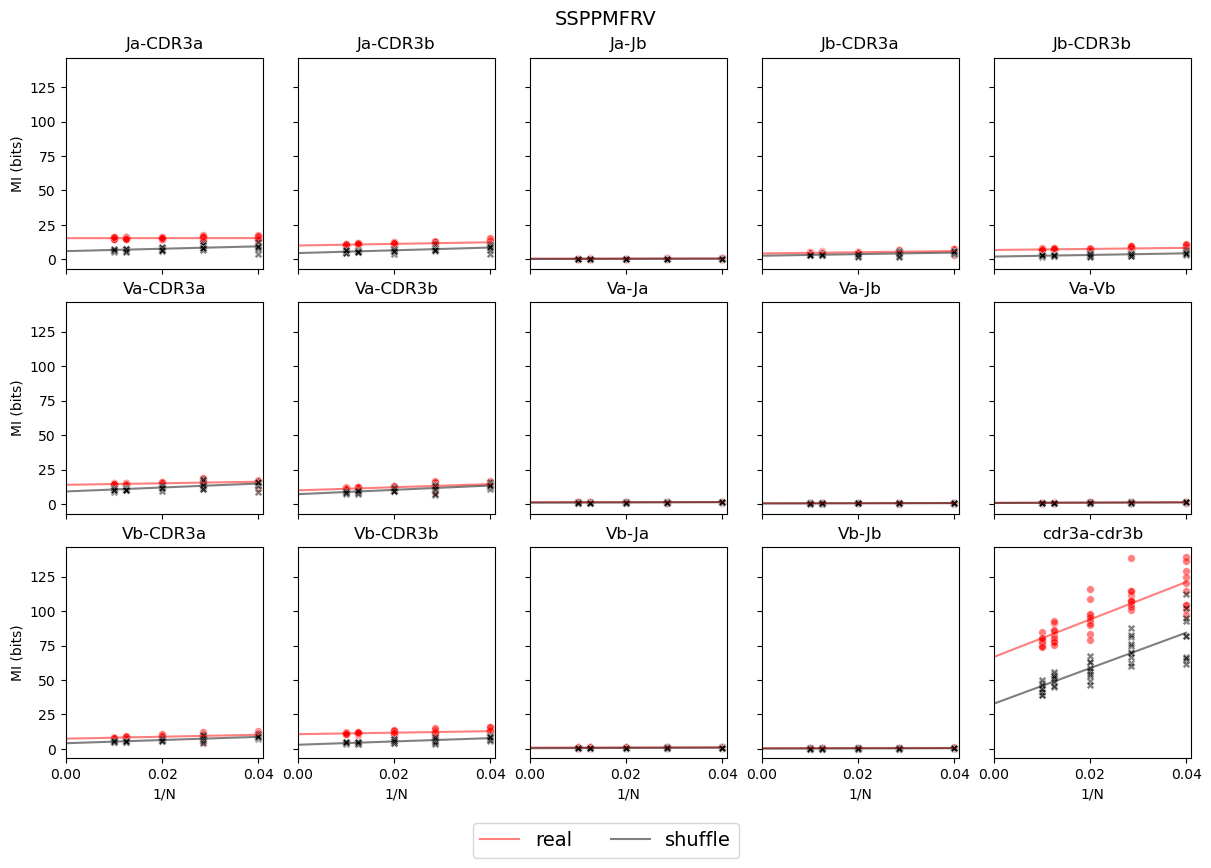

SSYRRPVGI


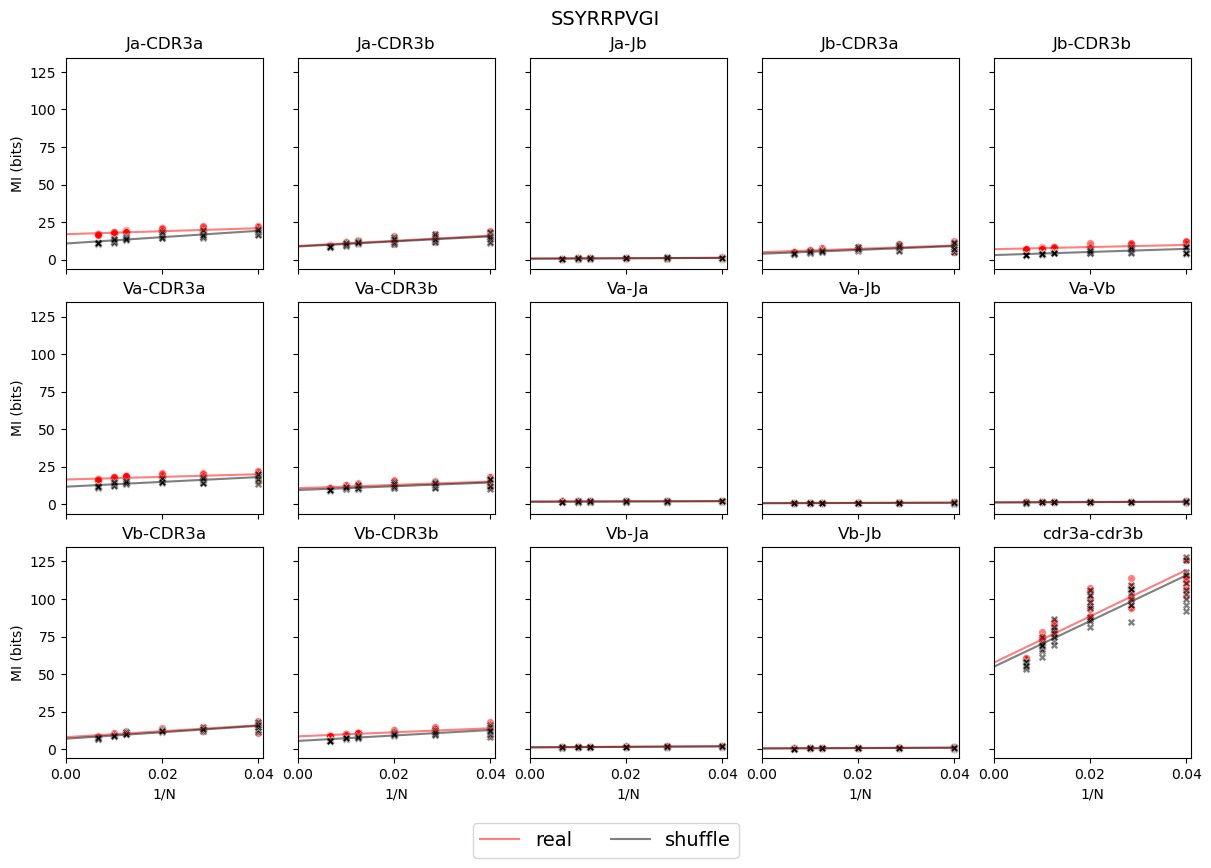

TTDPSFLGRY


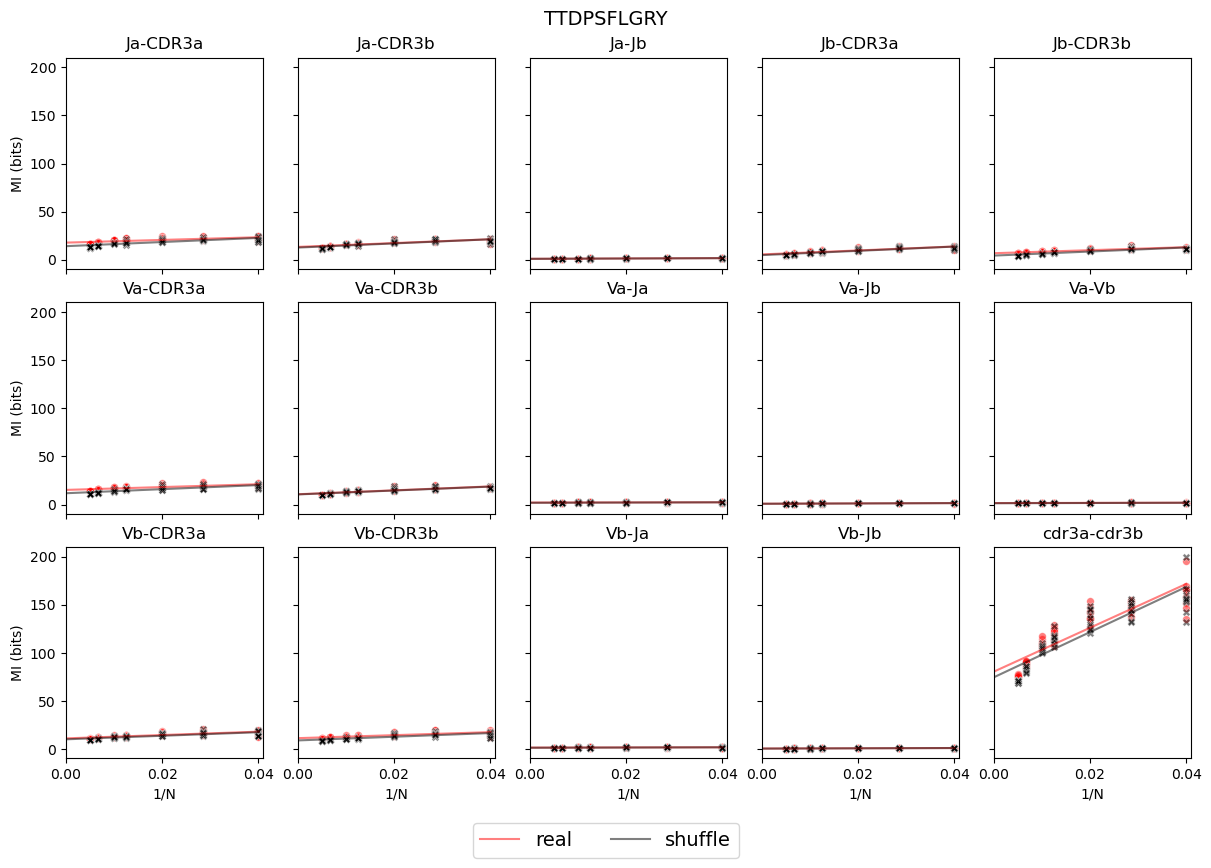

Tanno::A1::naive


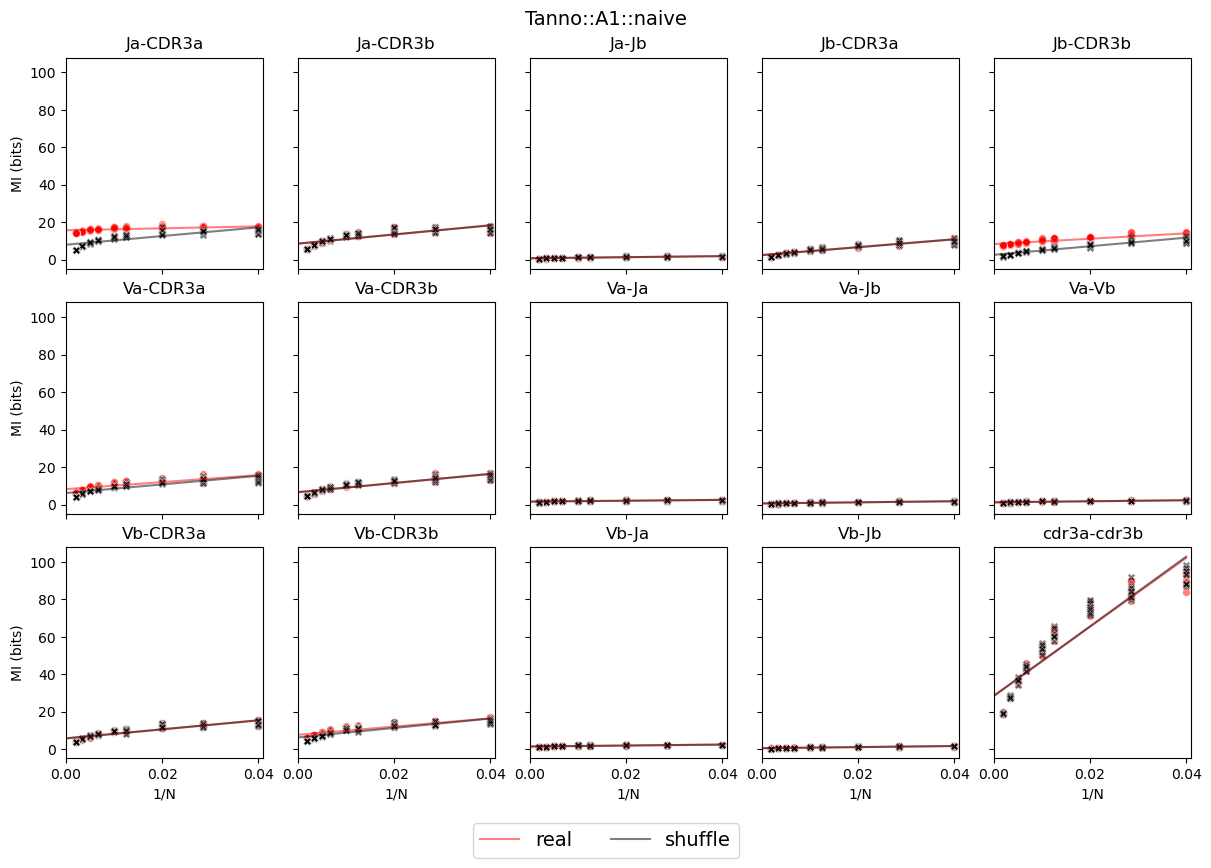

YLQPRTFLL


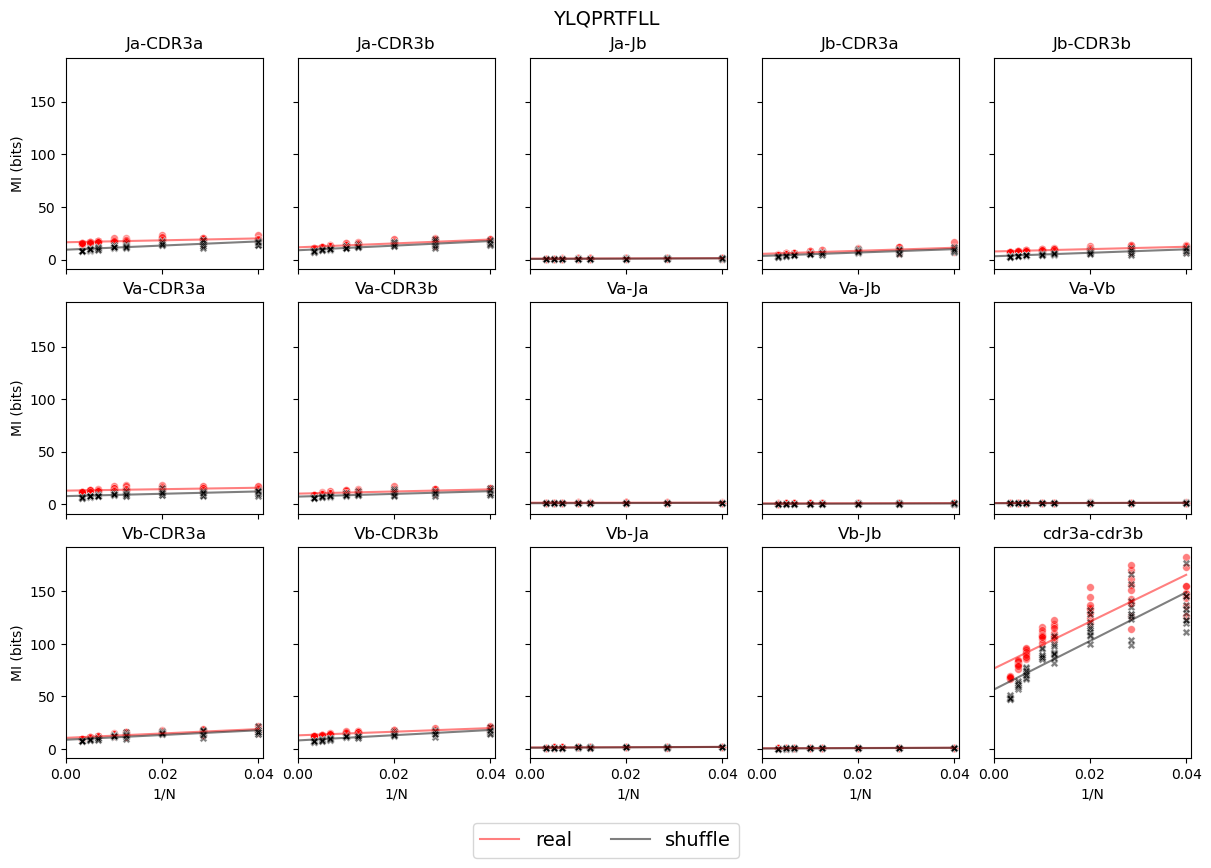

background


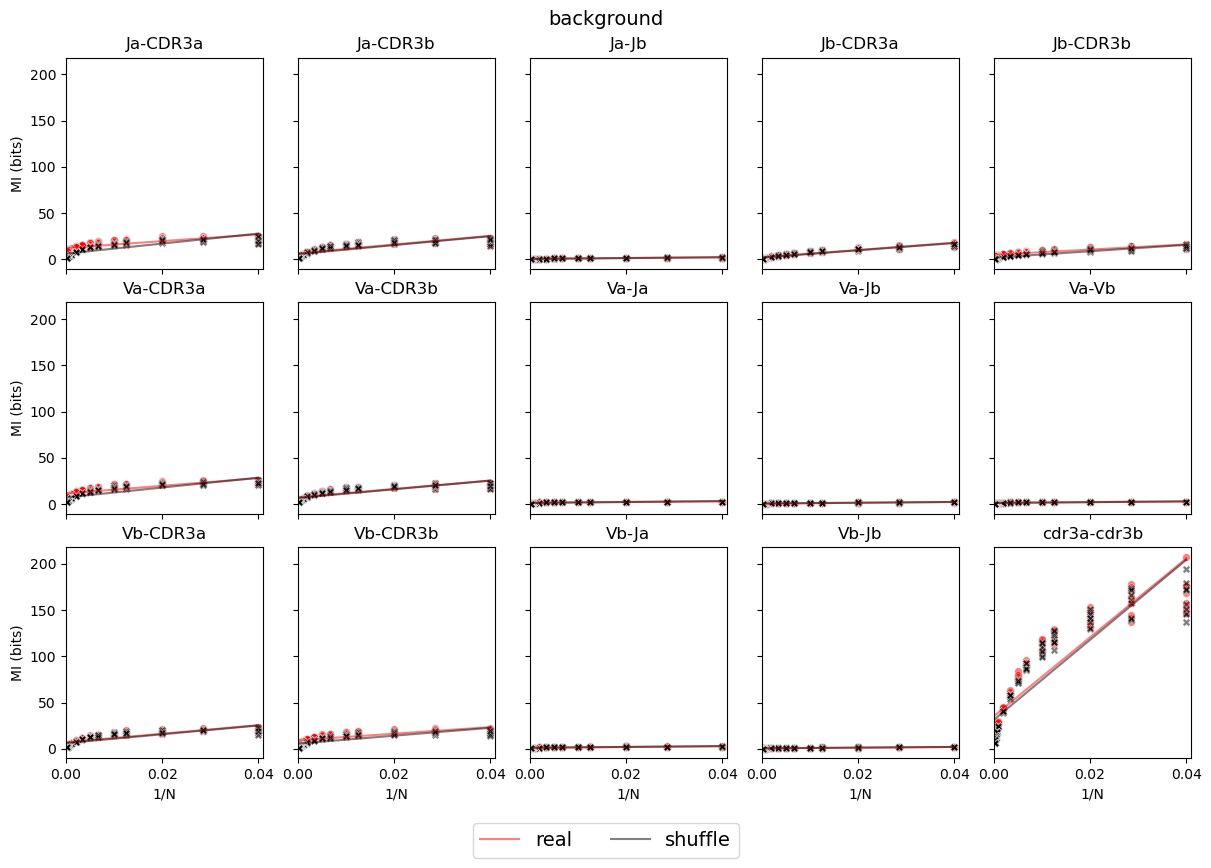

In [18]:
single_val = {}
s = MI2.shape
print(s)
print(MI2['type'].unique().tolist())
MI2_1 = MI2.dropna(subset='type')
print(MI2.shape)
assert s == MI2_1.shape

for ep in sorted(MI2['epitope'].unique().tolist()):
    print(ep)
    f, ax = plt.subplots(ncols=5, nrows=3, figsize=(12,8), sharex=True, sharey=True, constrained_layout=True)
    axs = ax.ravel()
    for i, t in enumerate(sorted(MI2['type'].unique().tolist())):
        # print(i, t)
        ss = MI2.loc[(MI2.epitope == ep) & (MI2.type == t)]
        # print(ss.sort_values(by='value', ascending=False))
        single_val[ep + '_' + t] = fit_linear(ss, t, axs[i])
        # print(single_val)
        axs[i].set_ylabel('')
        if i in [0,5,10]:
            axs[i].set_ylabel('MI (bits)')
        if i >= 10:
            axs[i].set_xlabel('1/N')
        
        h, l = axs[i].get_legend_handles_labels()
        axs[i].get_legend().remove()
    lgd = f.legend(handles = h, labels = l,
            bbox_to_anchor=(0.5, -0.01), loc='upper center', 
            ncol=2, prop={'size': 14})
    title = f.suptitle(ep, fontsize=14)
    if ep == 'GLCTLVAML':
        plt.savefig(output_folder + 'MI_estimation_GLC_endpadding.png',
                    bbox_extra_artists=(lgd,title,), bbox_inches='tight')
    plt.show()


In [19]:
MI

25     \
type        Unnamed: 0                                                                    
cdr3a-cdr3b ELAGIGILTV                [147.40340242308713, 162.63568206662234, 148.3...   
            ELAGIGILTV_shuffle        [148.3489642602038, 164.00845067226834, 150.28...   
Va-Vb       ELAGIGILTV                [0.7668382315802122, 0.7174352514213597, 0.945...   
            ELAGIGILTV_shuffle        [0.7113864571354167, 0.7938169516167372, 0.890...   
Ja-Jb       ELAGIGILTV                [1.6460124172766668, 1.7705078891098893, 1.496...   
...                                                                                 ...   
Vb-CDR3a    Tanno::A1::naive_shuffle  [13.61155314129504, 12.557971786861613, 15.349...   
Ja-CDR3b    Tanno::A1::naive          [15.344239232121112, 15.99950360590282, 17.432...   
            Tanno::A1::naive_shuffle  [15.62883610715204, 16.546683347543826, 17.168...   
Jb-CDR3a    Tanno::A1::naive          [10.099057662497554, 9.331757959186461, 10.364...   
            Tanno::A1::naive_shuffle  [10.566370642568177, 9.207262487353239, 10.240...   

                                                                                  35     \
type        Unnamed: 0                                                                    
cdr3a-cdr3b ELAGIGILTV                [140.20521776311728, 152.9896714769357, 152.05...   
            ELAGIGILTV_shuffle        [134.4182116765559, 154.06045589241495, 152.34...   
Va-Vb       ELAGIGILTV                [0.13981570115359868, 0.18715487160127692, 0.6...   
            ELAGIGILTV_shuffle        [0.13259651431886418, 0.19437405843601135, 0.6...   
Ja-Jb       ELAGIGILTV                [1.2201668375335515, 1.2785004424292479, 1.720...   
...                                                                                 ...   
Vb-CDR3a    Tanno::A1::naive_shuffle  [12.097320810517854, 13.332047533254464, 12.66...   
Ja-CDR3b    Tanno::A1::naive          [15.597674291390998, 17.22810807806905, 16.010...   
            Tanno::A1::naive_shuffle  [15.652232648673413, 16.891049417986263, 15.95...   
Jb-CDR3a    Tanno::A1::naive          [7.995168075245595, 9.628426321783117, 8.69965...   
            Tanno::A1::naive_shuffle  [7.789712376995757, 9.391287433172083, 8.85892...   

                                                                                  50     \
type        Unnamed: 0                                                                    
cdr3a-cdr3b ELAGIGILTV                [120.3379989352739, 107.10558175718307, 118.93...   
            ELAGIGILTV_shuffle        [123.7730006151808, 104.63603043321264, 118.57...   
Va-Vb       ELAGIGILTV                [0.4938307299777258, 0.7833519887414461, 0.794...   
            ELAGIGILTV_shuffle        [0.5229410465809627, 0.6809488926115641, 0.776...   
Ja-Jb       ELAGIGILTV                [1.257666056134626, 1.441690511755945, 1.40465...   
...                                                                                 ...   
Vb-CDR3a    Tanno::A1::naive_shuffle  [13.841349534902326, 13.502491818783064, 11.21...   
Ja-CDR3b    Tanno::A1::naive          [14.666829687867939, 17.42289758560369, 15.133...   
            Tanno::A1::naive_shuffle  [14.621000488252731, 17.152434674851524, 14.46...   
Jb-CDR3a    Tanno::A1::naive          [7.615213181924015, 8.446860471641715, 8.35019...   
            Tanno::A1::naive_shuffle  [8.042214964706304, 8.548461507608774, 7.45097...   

                                                                                  80     \
type        Unnamed: 0                                                                    
cdr3a-cdr3b ELAGIGILTV                [98.5820750453685, 98.73414081031711, 101.0915...   
            ELAGIGILTV_shuffle        [96.61389876996404, 100.43711992067537, 99.055...   
Va-Vb       ELAGIGILTV                [0.45239386999567505, 0.40093289368019835, 0.6...   
            ELAGIGILTV_shuffle        [0.406809696108186, 0.359372382395930

In [20]:
MI = pd.DataFrame(single_val, index = ['real', 'shuffle']).T
MI.to_csv('data/output/mutual_info/estimated_mutual_info_all_epitopes_endpadding.csv')

In [21]:
# pC = pd.read_csv('data/output/p_coincidence_vdj_tanno.csv', index_col=0)

In [22]:
# df = pd.merge(pC['1']+10**(-6), MI, left_index = True, right_index = True)
# print(df)
# df0 = df.loc[[x for x in df.index if x in epitopes]]
# df1 = df.loc[[x for x in df.index if 'naive' in x]]
# df2 = df.loc[[x for x in df.index if 'memory' in x]]
# df3 = df.loc[[x for x in df.index if (x not in epitopes) and ('naive' not in x) and ('memory' not in x)]]
# plt.scatter(df0['1'], df0['real'], marker = 's', color = 'magenta', alpha = 0.3, label = 'epitope', s = 50)
# plt.scatter(df1['1'], df1['real'], marker = 'v', color = 'blue', alpha = 0.3, label = 'naive', s = 50)
# plt.scatter(df2['1'], df2['real'], marker = '^', color = 'green', alpha = 0.3, label = 'memory', s = 50)
# plt.scatter(df3['1'], df3['real'], marker = 'o', color = 'r', alpha = 0.3, label = 'repertoire', s = 50)
# plt.scatter(df['1'], df['shuffle'], marker = 'P', color = 'k', alpha = 0.7, s = 30)
# plt.xlabel('pc(d=1)')
# plt.ylabel('Mutual information - 10^-6')
# for ep in epitopes:
#     plt.text(s = ep[0:3], x = df.loc[ep]['1'], y = df.loc[ep]['real'])
# plt.loglog()
# plt.legend(loc='lower right')
# plt.show()

In [23]:
# df = pd.merge(pC['1']+10**(-6), MI, left_index = True, right_index = True)
# df0 = df.loc[[x for x in df.index if x in epitopes]]
# df1 = df.loc[[x for x in df.index if 'naive' in x]]
# df2 = df.loc[[x for x in df.index if 'memory' in x]]
# df3 = df.loc[[x for x in df.index if (x not in epitopes) and ('naive' not in x) and ('memory' not in x)]]
# plt.scatter(df3['1'], df3['real']/df3['shuffle'], marker = 'o', color = 'r', alpha = 0.3, label = 'repertoire', s = 50)
# plt.scatter(df0['1'], df0['real']/df0['shuffle'], marker = 's', color = 'magenta', alpha = 0.3, label = 'epitope', s = 50)
# plt.scatter(df1['1'], df1['real']/df1['shuffle'], marker = 'v', color = 'blue', alpha = 0.3, label = 'naive', s = 50)
# plt.scatter(df2['1'], df2['real']/df2['shuffle'], marker = '^', color = 'green', alpha = 0.3, label = 'memory', s = 50)
# plt.xlabel('pc(d = 1)')
# plt.ylabel('Mutual information - 10^-6, real/shuffle')
# for ep in epitopes:
#     plt.text(s = ep[0:3], x = df.loc[ep]['1'], y = df.loc[ep]['real']/df.loc[ep]['shuffle'])
# plt.axhline(1, c='k', ls=':')
# plt.semilogx()
# plt.legend(bbox_to_anchor = [1.01, 1], loc = 'upper left')
# plt.show()

In [24]:
# df = pd.merge(epitope_counts, MI, left_index = True, right_index = True)
# print(df)
# plt.scatter(df['Epitope'], df['real']/df['shuffle'], marker = 's', color = 'magenta', alpha = 0.3, s = 50)
# plt.axhline(y=1, ls = ':', c = 'k')
# plt.xlabel('Dataset size')
# plt.ylabel('Mutual information - 10^-6, real/shuffle')
# for ep in epitopes:
#     plt.text(s = ep[0:3], x = df.loc[ep]['Epitope'], y = df.loc[ep]['real']/df.loc[ep]['shuffle'])
# plt.semilogx()
# plt.show()

In [25]:
# df = pd.merge(epitope_counts, pC+10**(-3), left_index = True, right_index = True)
# print(df)
# plt.scatter(df['Epitope'], df['1'], marker = 's', color = 'magenta', alpha = 0.3, s = 50)
# plt.axhline(y=0, ls = ':', c = 'k')
# plt.xlabel('Dataset size')
# plt.ylabel('pc(d = 1)')
# for ep in epitopes:
#     plt.text(s = ep[0:3], x = df.loc[ep]['Epitope'], y = df.loc[ep]['1'])
# plt.loglog()
# plt.show()